<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_25_9_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 596 kB 5.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#model = torch_hub.load()

NameError: ignored

In [ ]:
#https://github.com/ultralytics/yolov5/issues/36

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = 'traffic-signal-0.jpg'

# Inference
results = model(img)

results.pandas().xyxy[0]
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-10-25 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,186.523438,331.281250,286.914062,560.187500,0.854492,9,traffic light
1,374.804688,262.140625,481.250000,502.374969,0.845215,9,traffic light


In [ ]:
signals = results.pandas().xyxy[0]

In [ ]:
signals

,xmin,ymin,xmax,ymax,confidence,class,name
0,186.523438,331.281250,286.914062,560.187500,0.854492,9,traffic light
1,374.804688,262.140625,481.250000,502.374969,0.845215,9,traffic light


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
src = cv2.imread(img)

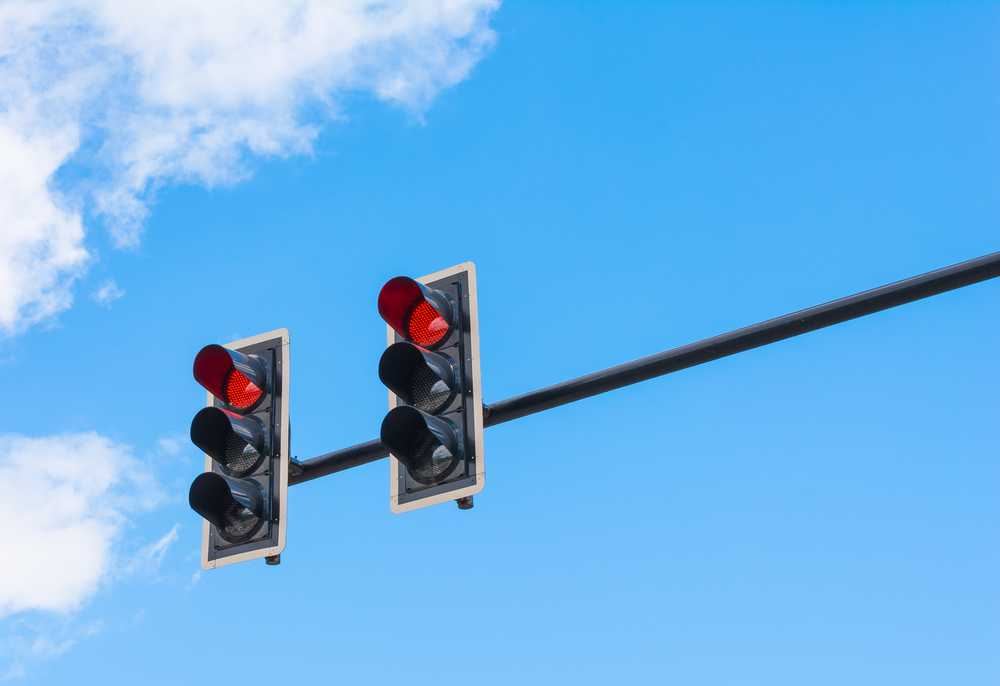

In [ ]:
cv2_imshow(src) #리사이즈까지 다 해줌

In [ ]:
x1, y1, x2, y2 = int(signals.iloc[0,0]), int(signals.iloc[0,1]), int(signals.iloc[0,2]), int(signals.iloc[0,3])

In [ ]:
print(x1, y1, x2, y2)

186 331 286 560


In [ ]:
signal0 = src[y1:y2, x1:x2]

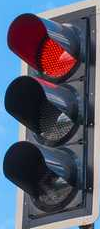

In [ ]:
cv2_imshow(signal0)

In [ ]:
import numpy as np

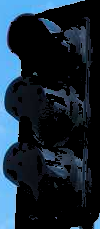

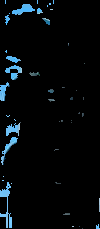

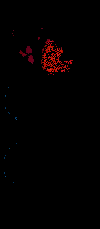

In [ ]:
hsv_frame = cv2.cvtColor(signal0, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal0, signal0, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal0, signal0, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal0, signal0, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal0, signal0, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result) #이렇게 빨 간색이 나옴, 하얗게 반사가 된 곳은 제외 로컬 라이제이션, 오픈 cv